In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import Counter

In [2]:
data_path = '../../data/lda_jsd_toprev_conlen/'

In [3]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

### Time dist

In [4]:
times = Counter()
for fandom in fandom_list:
    df = pd.read_csv(data_path + fandom, sep = '\t')
    times += Counter(df.PublishDate.str[:7].tolist())

In [5]:
time_labels = sorted(times.keys())[:-1]

In [6]:
agg = 0
for l in time_labels:
    if int(l[0:4]) < 2009:
        agg += times[l]
time_labels = [l for l in time_labels if int(l[0:4]) >=  2009]

In [7]:
x = np.arange(1, len(time_labels) +1)
y = [times[k] for k in time_labels]

In [8]:
time_labels.insert(0,' ')

Number of works in each fandom

In [9]:
fandom_size = {}
s = 0
for f in fandom_list:
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    fandom_size[len(df)] = f.split('.')[0]
    s += len(df)

In [10]:
fandom_size

{921: 'shakespare_william_works_temporal_lda_jsd_toprev_full',
 1643: 'bishoujo_senshi_sailor_moon_temporal_lda_jsd_toprev_full',
 2103: 'hamilton_miranda_temporal_lda_jsd_toprev_full',
 8158: 'les_miserables_all_media_types_temporal_lda_jsd_toprev_full',
 8159: 'kuroko_no_basuke_temporal_lda_jsd_toprev_full',
 9165: 'naruto_temporal_lda_jsd_toprev_full',
 10727: 'the_walking_dead_&_related_fandoms_temporal_lda_jsd_toprev_full',
 12215: 'haikyuu_temporal_lda_jsd_toprev_full',
 13360: 'buffy_the_vampire_slayer_temporal_lda_jsd_toprev_full',
 13685: 'one_direction_temporal_lda_jsd_toprev_full',
 14307: 'hetalia_axis_powers_temporal_lda_jsd_toprev_full',
 15345: 'arthurian_mythology_&_related_fandoms_temporal_lda_jsd_toprev_full',
 16638: 'star_wars_all_media_types_temporal_lda_jsd_toprev_full',
 20968: 'attack_on_titan_temporal_lda_jsd_toprev_full',
 29088: 'tolkien_j_r_r_works_&_related_fandoms_temporal_lda_jsd_toprev_full',
 31350: 'ms_paint_adventures_temporal_lda_jsd_toprev_full',
 3

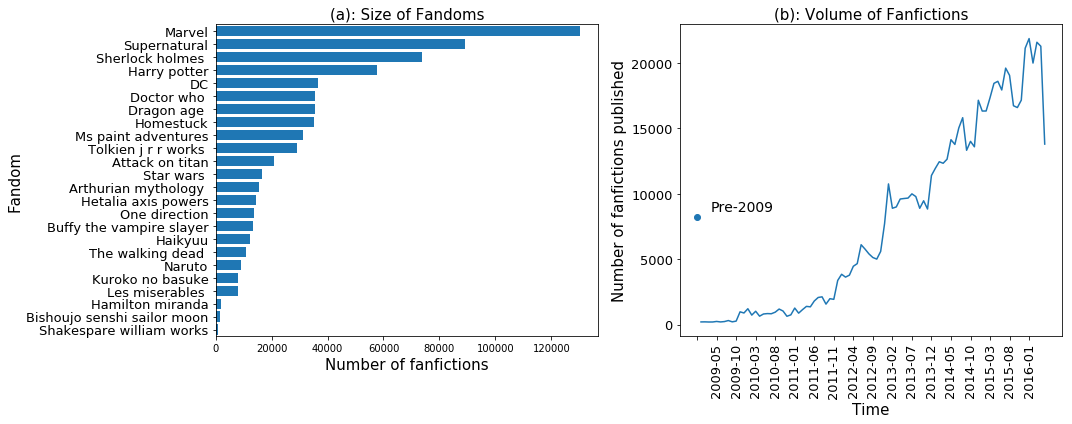

In [11]:
fig, ax = plt.subplots(1,2,figsize = (15,6))

idx = np.arange(len(fandom_size))
data = sorted(fandom_size.keys())
labels = [fandom_size[i].replace('_temporal_lda_jsd_toprev_full', '').replace('all_media_types', '').replace("&_related_fandoms", '').\
          replace("_", ' ').capitalize().replace('Dcu', 'DC') for i in sorted(fandom_size.keys())]
# maxl = max([len(label) for label in labels])
# labels = [label + " "*(maxl - len(label)) for label in labels]
# print(labels)
ax[0].barh(idx, data)
ax[0].set_yticks(range(0,24))
ax[0].set_yticklabels(labels)

for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    tick.label.set_horizontalalignment('right')
    
# find the maximum width of the label on the major ticks
# yax = ax[0].get_yaxis()
# yax.set_tick_params(pad=pad)

# for tick in ax[0].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
    
ax[0].set_ylim(-0.5, 23.5)
ax[0].set_ylabel("Fandom", fontsize = 15)
ax[0].set_xlabel("Number of fanfictions", fontsize = 15)
ax[0].set_title('(a): Size of Fandoms', fontsize = 15)


time_labels_f =[l for l in time_labels if time_labels.index(l)%5==0]
ax[1].scatter(0, agg)
ax[1].plot(x, y)
ax[1].set_xticks(np.arange(0, len(time_labels), 5))
ax[1].set_xticklabels(time_labels_f)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    tick.label.set_rotation(90)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[1].set_xlabel("Time", fontsize=15)
ax[1].set_ylabel("Number of fanfictions published",fontsize=15)
ax[1].set_title('(b): Volume of Fanfictions', fontsize = 15)

ax[1].text(0.08, 0.4, "Pre-2009", fontsize=14, transform=ax[1].transAxes)
# plt.xlim(-1,90)
# start_idx = labels.index('2010-01')
# end_idx = labels.index('2016-05')

plt.tight_layout()

plt.savefig("fic_time_fandom_size_dist.pdf", format="pdf")

Length distribution

In [12]:
def create_timelist(df):
    timelist = df.PublishDate.drop_duplicates().tolist()
    timelist = [str(i)[:7] for i in timelist]
    return sorted(list(set(timelist)))

In [13]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [14]:
for f in os.listdir(data_path):
    word_month = {}
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    df = df.drop(['ChapterIndex', 'URL','CompleteDate','UpdateDate'], axis=1)
    df = df.drop_duplicates()
    tl = create_timelist(df)
    for t in tl:
        df_t = create_df_time(df,t)
        word_month[t] = df_t.Words.sum()
    for k,v in word_month.items():
        print(k,v)
    break


2013-03 19481
2013-04 602995
2013-05 176019
2013-06 4840
2013-07 181297
2013-08 109533
2013-09 57475
2013-10 129374
2013-11 120499
2013-12 62464
2014-01 40129
2014-02 38083
2014-03 60781
2014-04 46083
2014-05 329912
2014-06 22456
2014-07 145546
2014-08 167088
2014-09 131865
2014-10 64836
2014-11 41630
2014-12 167426
2015-01 31680
2015-02 333396
2015-03 325541
2015-04 164765
2015-05 183057
2015-06 271704
2015-07 324317
2015-08 645187
2015-09 114668
2015-10 264551
2015-11 292442
2015-12 205067
2016-01 267594
2016-02 61582
2016-03 757498
2016-04 283115
2016-05 166754


Kudos/Comments

In [15]:
kudos_all = []
comments_all = []
hits_all = []
bookmarks_all = []
for f in fandom_list:
    df = pd.read_csv(os.path.join(data_path, f), sep = '\t')
    df.Kudos = df.Kudos/df.Chapters
    df.Hits = df.Hits/df.Chapters
    df.Bookmarks = df.Bookmarks/df.Chapters
    for item in df.Kudos.tolist():
        kudos_all.append(item)
    for item in df.Comments.tolist():
        comments_all.append(item)
    for item in df.Hits.tolist():
        hits_all.append(item)
    for item in df.Bookmarks.tolist():
        bookmarks_all.append(item)
 

In [16]:
# plt.figure(figsize = (10,7))
x1 = [i if not np.isnan(i) else 0 for i in kudos_all ]
x2 = [i if not np.isnan(i) else 0 for i in hits_all ]
x3 = [i if not np.isnan(i) else 0 for i in comments_all ]
x4 = [i if not np.isnan(i) else 0 for i in bookmarks_all ]

# print (len(x),len(y))
# data = np.vstack([x, y]).T

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


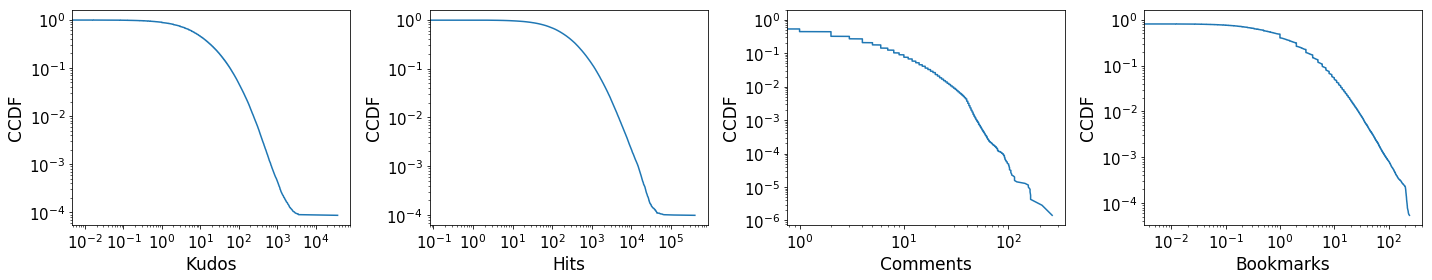

In [28]:
plt.figure(figsize=(20,4))
plt.subplot(1, 4, 1)


X = sorted(x1, reverse=True)
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.loglog(X,Y)
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xlabel('Kudos',fontsize = '17')
plt.ylabel("CCDF", fontsize='17')


plt.subplot(1, 4, 2)

# X = np.log10(sorted(x1))
# N = len(X)
# plt.step(X[::-1], np.arange(X.size)/N)


plt.subplot(1, 4, 2)

X = sorted(x2, reverse=True)
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.loglog(X,Y, label='Hits')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xlabel('Hits',fontsize = '17')
plt.ylabel("CCDF", fontsize='17')

plt.subplot(1, 4, 3)

X = sorted(x3, reverse=True)
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.loglog(X,Y, label='Comments')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xlabel('Comments',fontsize = '17')
plt.ylabel("CCDF", fontsize='17')

plt.subplot(1, 4, 4)

X = sorted(x4, reverse=True)
N = len(X)
Y = np.linspace( 1/N, 1, num=N)
plt.loglog(X,Y, label='Bookmarks')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xlabel('Bookmarks',fontsize = '17')
plt.ylabel("CCDF", fontsize='17')


plt.tight_layout()
plt.savefig('kudos_comments_hits_bookmarks_ccdf.pdf', type='pdf')



In [18]:
def create_timewindow(timelist, window_len):
    idx = 0
    window_all = []
    while idx <= len(timelist) - window_len:
        time_window = []
        for i in range(0, window_len):
            time_window.append(timelist[idx + i])
        idx += 1
        window_all.append(time_window)
    return window_all

In [19]:
def create_df_time(df, time_window):
    return df[df.PublishDate.str[:7] == time]

In [20]:
def create_timelist(df):
    timelist = df.PublishDate.drop_duplicates().tolist()
    timelist = [str(i)[:7] for i in timelist]
    return sorted(list(set(timelist)))

In [21]:
plt.figure(figsize = (20, 10))
label_all = []
for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    df = df[['Author', 'PublishDate', 'Words']]
    
    timelist = create_timelist(df)[:-1]
    time_work_dict = {}
    for time in timelist:
        df_t = create_df_time(df, time)
        time_work_dict[time] = len(df_t)
    label = sorted(time_work_dict.keys())
    label_all.append(label)
    x = range(len(label))
    y = [time_work_dict[l] for l in label]
    plt.plot(x,y)
#     plt.xticks(x, label, rotation=90)

FileNotFoundError: File b'../../data/lda_jsd_toprev_conlen/shakespare_william_works_temporal_lda_jsd_toprev_full.tsv_metadata.tsv' does not exist

<Figure size 1440x720 with 0 Axes>

In [32]:
authors = []
for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
    authors.extend(df['Author'].tolist())
print(len(set(authors)))

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


132162
